In [5]:
"""
Bootstrap Hypothesis Testing

Input: Original sample data X = [X₁, X₂, ..., Xₙ], constraints a, b
Output: Estimated probability p

1. Compute the sample mean:
   X̄ = (1/n) * sum(X_i for i from 1 to n)

2. Initialize counter:
   count = 0

3. For k from 1 to M (number of bootstrap iterations):
   a. Generate a bootstrap sample X* by sampling with replacement from X
   b. Compute the bootstrap mean:
      X̄* = (1/n) * sum(X*_i for i from 1 to n)
   c. Calculate deviation:
      d = X̄* - X̄
   d. If a < d < b:
      Increment count by 1

4. Estimate probability:
   p = count / M

Return p

"""

'\nBootstrap Hypothesis Testing\n\nInput: Original sample data X = [X₁, X₂, ..., Xₙ], constraints a, b\nOutput: Estimated probability p\n\n1. Compute the sample mean:\n   X̄ = (1/n) * sum(X_i for i from 1 to n)\n\n2. Initialize counter:\n   count = 0\n\n3. For k from 1 to M (number of bootstrap iterations):\n   a. Generate a bootstrap sample X* by sampling with replacement from X\n   b. Compute the bootstrap mean:\n      X̄* = (1/n) * sum(X*_i for i from 1 to n)\n   c. Calculate deviation:\n      d = X̄* - X̄\n   d. If a < d < b:\n      Increment count by 1\n\n4. Estimate probability:\n   p = count / M\n\nReturn p\n\n'

Estimated probability p: 0.7451


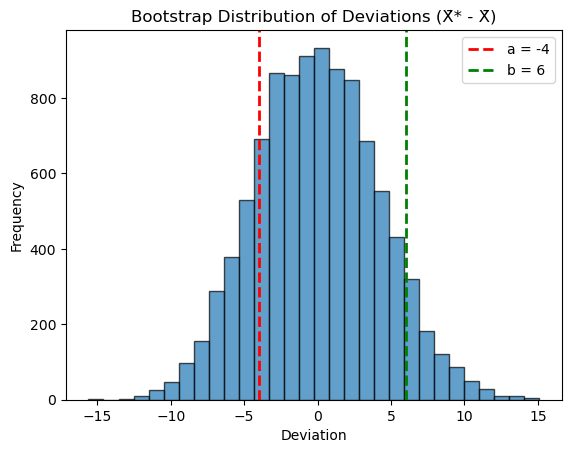

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize Parameters
data = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
a = -4
b = 6
M = 10000  # Number of bootstrap iterations

# Step 2: Compute Sample Mean
X_bar = np.mean(data)

# Step 3: Bootstrap Process
count = 0
deviations = []  # To store deviations for visualization

for _ in range(M):
    # Generate bootstrap sample
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    # Compute bootstrap mean
    X_bar_star = np.mean(bootstrap_sample)
    # Calculate deviation
    d = X_bar_star - X_bar
    deviations.append(d)
    # Check if deviation falls between a and b
    if a < d < b:
        count += 1

# Step 4: Estimate Probability
p = count / M

print(f"Estimated probability p: {p:.4f}")

# Optional: Plot the distribution of deviations
plt.hist(deviations, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(a, color='r', linestyle='dashed', linewidth=2, label=f'a = {a}')
plt.axvline(b, color='g', linestyle='dashed', linewidth=2, label=f'b = {b}')
plt.title('Bootstrap Distribution of Deviations (X̄* - X̄)')
plt.xlabel('Deviation')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bootstrap_distribution.png')
plt.show()